# SEABORN

**Seaborn is a Python data visualization library that builds on top of matplotlib. It provides a high-level interface for creating attractive and informative statistical graphics.**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #pyplot is subclass of matplotlib and matplotlib is our superclass
import matplotlib as mpl
import seaborn as sns
import os


In [18]:
auto=pd.read_csv('Automobile_data.csv')  #for reading csv file
auto.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


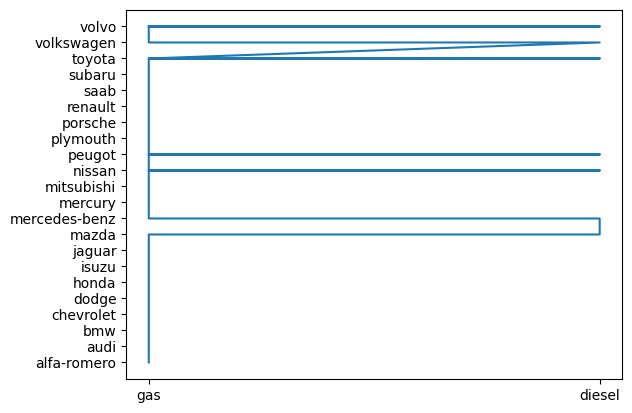

In [19]:
plt.plot(auto["fuel-type"],auto["make"])
plt.show()

In [20]:
brandVsfuel=auto.groupby(["make","fuel-type"]).size().unstack(fill_value=0) #unstack fills the empty values with zero
brandVsfuel

fuel-type,diesel,gas
make,,
alfa-romero,0,3
audi,0,7
bmw,0,8
chevrolet,0,3
dodge,0,9
honda,0,13
isuzu,0,4
jaguar,0,3
mazda,2,15


<function matplotlib.pyplot.show(close=None, block=None)>

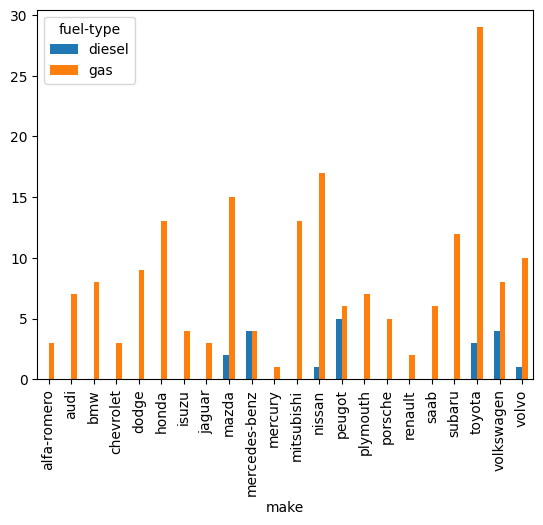

In [21]:
brandVsfuel.plot(kind="bar",stacked=False) #this is for making the graph stacked on above of each other
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

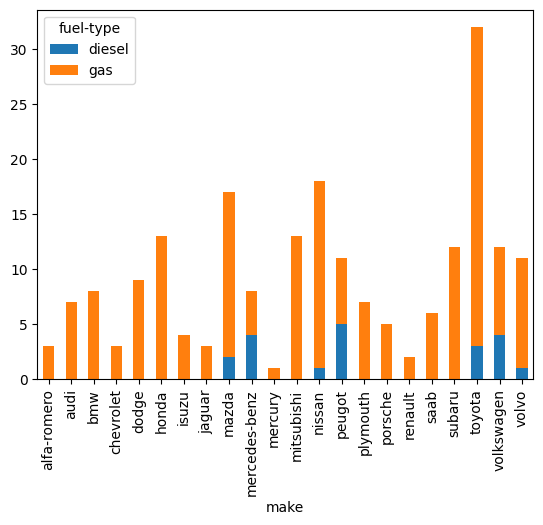

In [22]:
brandVsfuel.plot(kind="bar",stacked=True) 
plt.show

In [26]:
brandVsNodoors=auto.groupby(["make","num-of-doors"]).size().unstack(fill_value=0) #unstack fills the empty values with zero
brandVsNodoors

num-of-doors,?,four,two
make,,,
alfa-romero,0,0,3
audi,0,5,2
bmw,0,5,3
chevrolet,0,1,2
dodge,1,4,4
honda,0,5,8
isuzu,0,2,2
jaguar,0,2,1
mazda,1,7,9


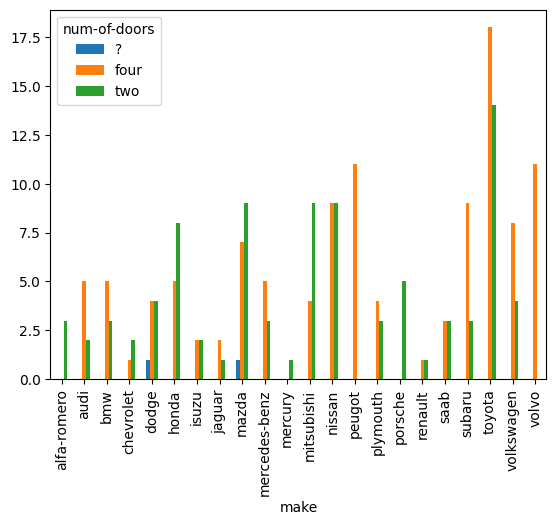

In [24]:
brandVsNodoors.plot(kind="bar",stacked=False)
plt.show()

# create a new column of car type and tell how many cars are coming that categary

In [39]:
#car type 
# budget = 5 - 10
# good = 10 - 15
# best = 15 - 20
# normal = 20 -25
# expensive = 25 above
def car_type(p):
    if p=='?':
        return "Price not available"
        
    x=int(p)
    if x>=5000 and x<=10000:
        return "Budget Car"
    elif x>10000 and x<=15000:
        return "Good Car"
    elif x>15000 and x<=20000:
        return "Best Car"
    elif x>20000 and x<=25000:
        return "Normal Car"
    else:
        return "Expensive Car"

auto['Car type']=auto['price'].apply(car_type)
auto


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,Car type
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,Good Car
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,Best Car
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,Best Car
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.4,10.0,102,5500,24,30,13950,Good Car
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.4,8.0,115,5500,18,22,17450,Best Car
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845,Best Car
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045,Best Car
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485,Normal Car
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,idi,3.01,3.4,23.0,106,4800,26,27,22470,Normal Car


# text question

In [3]:
ship=pd.read_csv('titanic.csv')
ship

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [4]:
ship.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
